<a href="https://colab.research.google.com/github/snehakap/Treue-Technologies/blob/main/Customer_Segmentation_for_Online_Retail_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation for Online Retail**
# **Sneha Kapoor**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
data = pd.read_excel('Online Retail.xlsx')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.dropna(subset=['CustomerID'], inplace=True)

In [10]:
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()
customer_data.rename(columns={'InvoiceNo': 'PurchaseFrequency',
                              'Quantity': 'TotalQuantity',
                              'UnitPrice': 'AvgUnitPrice'}, inplace=True)

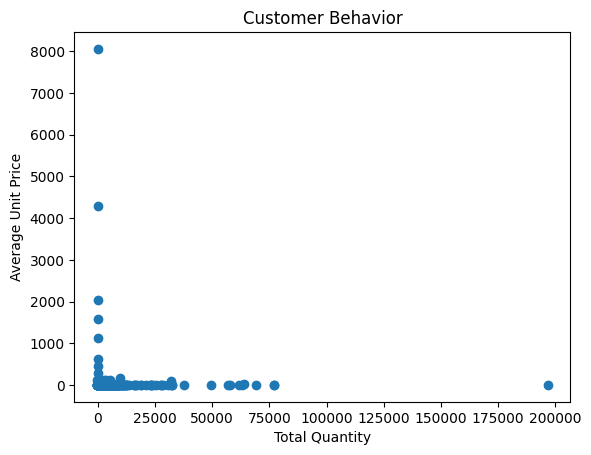

In [11]:
plt.scatter(customer_data['TotalQuantity'], customer_data['AvgUnitPrice'])
plt.xlabel('Total Quantity')
plt.ylabel('Average Unit Price')
plt.title('Customer Behavior')
plt.show()

In [12]:
features = customer_data[['PurchaseFrequency', 'TotalQuantity', 'AvgUnitPrice']]

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
customer_data['PCA1'] = pca_result[:, 0]
customer_data['PCA2'] = pca_result[:, 1]

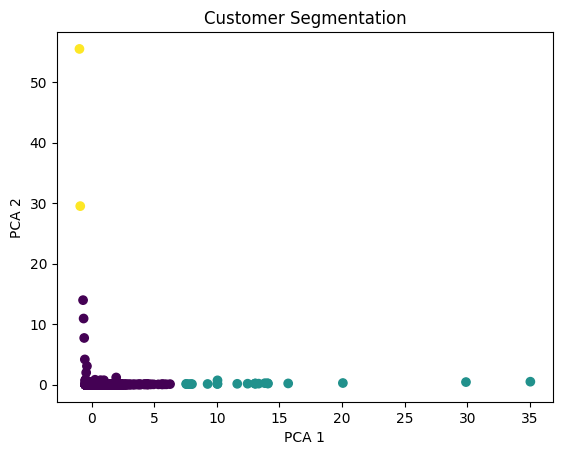

In [17]:
plt.scatter(customer_data['PCA1'], customer_data['PCA2'], c=customer_data['Cluster'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation')
plt.show()